In [8]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [1]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Penguin Classification
The goal is to classify each species. Therefore, the target variable is species. There are two features with discrete, categorical data (island and sex), four features with quantitative, continuous data (bill and flipper dimensions, and body mass), and one feature with quantitative, ordinal, discrete data (year)
### First load dataset

344


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


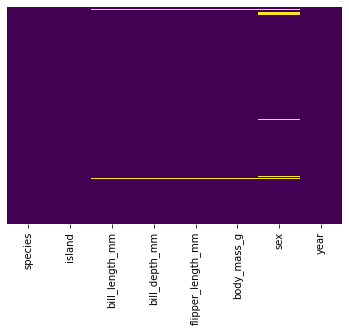

In [2]:
penguins = load_penguins()
print(len(penguins))
sns.heatmap(penguins.isnull(),cbar=False,cmap='viridis',yticklabels=False)
penguins.head()

We are missing some data! Let's clean it

In [3]:
clean_df = penguins.dropna()
clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


It might be helpful to split between discrete and continuous data

In [4]:
df_cont = clean_df[["species","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
df_disc = clean_df[["species","island","sex","year"]]

#  How many species are there?
What are typical differences between them?

In [5]:
clean_df.groupby("species").agg({"bill_length_mm":"mean",
                                 "bill_depth_mm":"mean",
                                 "flipper_length_mm":"mean",
                                 "body_mass_g":"mean"})

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


There are three species. It looks like: Adelie has shorter bill lengths, Gentoo has shorter bill depth, they all have different flipper lengths, and gentoo's are much heavier.


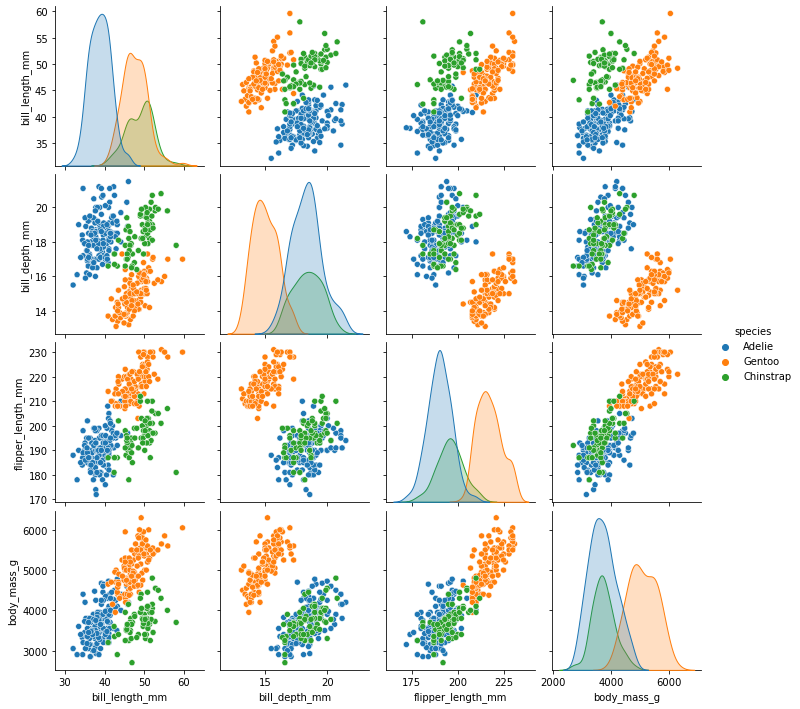

In [6]:
pairplot_figure = sns.pairplot(df_cont, hue="species")

The pair-plot shows the distribution of each quantitative continuous feature/dependent variable for each species. 

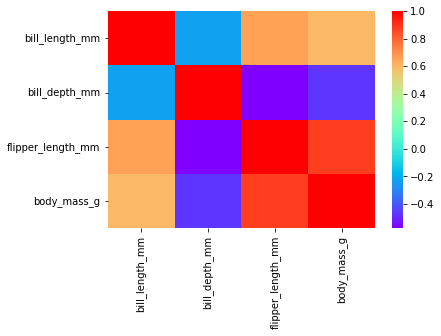

In [7]:
corr = df_cont.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'rainbow', annot= False); 

Note above that body mass and flipper length seem to be strongly, positively correlated

#### Discrete features
All species should have similar amount of male and female so obviously that shouldn't be a feature by itself. But perhaps it can be combined with something else. For example, maybe male adelie's have really long flippers or something.

Let's look for anything unexpected for "years" column

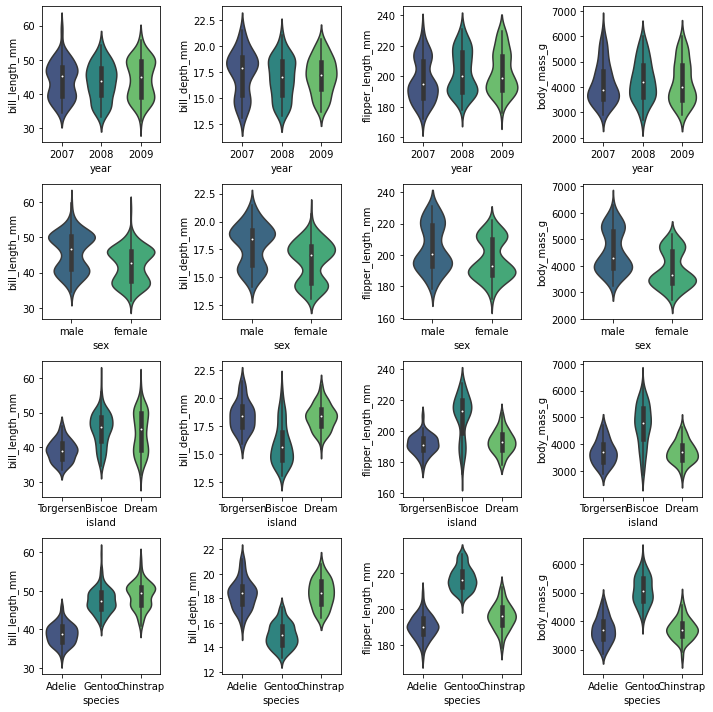

In [8]:
fig,ax = plt.subplots(4,4,figsize=(10,10))

### year
sns.violinplot(x='year', y='bill_length_mm',data=clean_df,palette='viridis',ax=ax[0,0])
sns.violinplot(x='year', y='bill_depth_mm',data=clean_df,palette='viridis',ax=ax[0,1])
sns.violinplot(x='year', y='flipper_length_mm',data=clean_df,palette='viridis',ax=ax[0,2])
sns.violinplot(x='year', y='body_mass_g',data=clean_df,palette='viridis',ax=ax[0,3])

### sex
sns.violinplot(x='sex', y='bill_length_mm',data=clean_df,palette='viridis',ax=ax[1,0])
sns.violinplot(x='sex', y='bill_depth_mm',data=clean_df,palette='viridis',ax=ax[1,1])
sns.violinplot(x='sex', y='flipper_length_mm',data=clean_df,palette='viridis',ax=ax[1,2])
sns.violinplot(x='sex', y='body_mass_g',data=clean_df,palette='viridis',ax=ax[1,3])

### island
sns.violinplot(x='island', y='bill_length_mm',data=clean_df,palette='viridis',ax=ax[2,0])
sns.violinplot(x='island', y='bill_depth_mm',data=clean_df,palette='viridis',ax=ax[2,1])
sns.violinplot(x='island', y='flipper_length_mm',data=clean_df,palette='viridis',ax=ax[2,2])
sns.violinplot(x='island', y='body_mass_g',data=clean_df,palette='viridis',ax=ax[2,3])

### species
sns.violinplot(x='species', y='bill_length_mm',data=clean_df,palette='viridis',ax=ax[3,0])
sns.violinplot(x='species', y='bill_depth_mm',data=clean_df,palette='viridis',ax=ax[3,1])
sns.violinplot(x='species', y='flipper_length_mm',data=clean_df,palette='viridis',ax=ax[3,2])
sns.violinplot(x='species', y='body_mass_g',data=clean_df,palette='viridis',ax=ax[3,3])
plt.tight_layout()

Insight:
    
1) The year in which data is taken does not matter at all!
2) Males and females differ. Males are usually bigger and heavier.
3) The penguins are inhomogeneously distributed by island


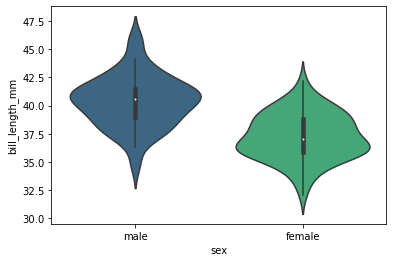

In [9]:
test = clean_df[(clean_df["species"]=="Adelie")]

sns.violinplot(x='sex', y='bill_length_mm',data=test,palette='viridis')
plt.show()

In [10]:
# Dummy variable
categorical_columns = ['island','sex']
df_encode = pd.get_dummies(data = clean_df, prefix_sep='_', #OHE is one-hot encoding
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df_encode = df_encode.drop(columns="year")

In [11]:
df_encode

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,1,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,1,0,0
341,Chinstrap,49.6,18.2,193.0,3775.0,1,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,1,0,1


### Normalize data

In [70]:
X = df_encode.drop(columns=["species"])
y = df_encode["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

normalized_x_test = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns = X_test.columns
)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [72]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(normalized_x_train, y_train)
y_pred = clf.predict(normalized_x_test)
R2 = clf.score(normalized_x_train,y_train) 
print("Random forest model. R-squared score is: {:.3f}".format(R2))

Random forest model. R-squared score is: 0.987


In [109]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
R2 = clf.score(X_train,y_train) 
print("Decision Tree. R-squared score is: {:.3f}".format(R2))

Decision Tree. R-squared score is: 0.963


In [110]:
feature_names = np.array(X_test.keys())

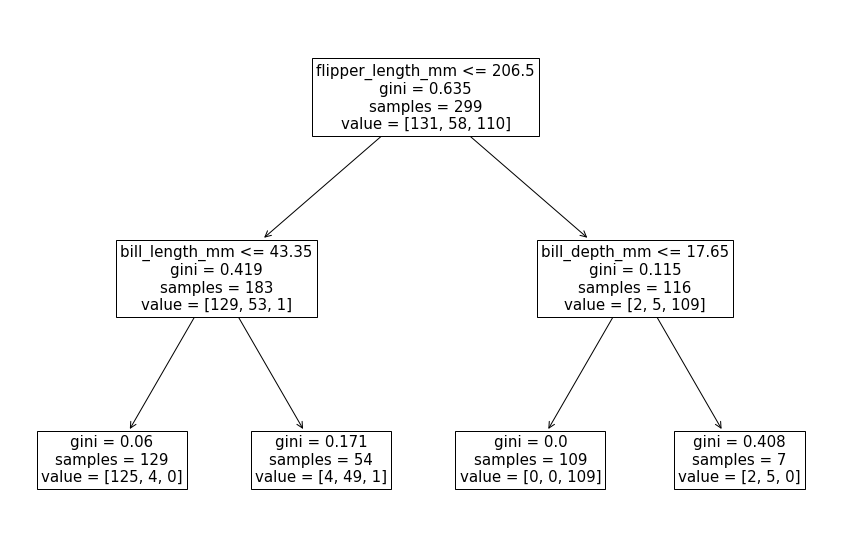

In [113]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
tree.plot_tree(clf,feature_names=feature_names,fontsize=15,ax=ax);

In [116]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(normalized_x_train, y_train)
y_pred = clf.predict(normalized_x_test)
R2 = clf.score(normalized_x_train,y_train) 
print("LogisticRegression model. R-squared score is: {:.3f}".format(R2))

LogisticRegression model. R-squared score is: 0.997


In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(normalized_x_train, y_train)
y_pred = clf.predict(normalized_x_test)
R2 = clf.score(normalized_x_train,y_train) 
print("LogisticRegression model. R-squared score is: {:.3f}".format(R2))
accuracy = accuracy_score(y_pred, y_test)
accuracy

LogisticRegression model. R-squared score is: 0.789


0.7941176470588235

In [122]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(normalized_x_train, y_train)
y_pred = clf.predict(normalized_x_test)
R2 = clf.score(normalized_x_train,y_train) 
print("KNeighborsClassifier model. R-squared score is: {:.3f}".format(R2))

LogisticRegression model. R-squared score is: 0.997


In [125]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(normalized_x_train, y_train)
y_pred = clf.predict(normalized_x_test)
R2 = clf.score(normalized_x_train,y_train) 
print("SVC model. R-squared score is: {:.3f}".format(R2))

SVC model. R-squared score is: 0.993


In [77]:
# feature_names = np.array(X.keys())
# len(feature_names[0])


In [76]:
# import graphviz 
# from sklearn.tree import export_text
# r = export_text(clf)
# print(r)
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 

In [224]:
# print(classification_report(y_test, y_pred))

In [231]:
# X_test["species"] = y_pred
# sns.pairplot(X_test[["species","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]], hue="species")

